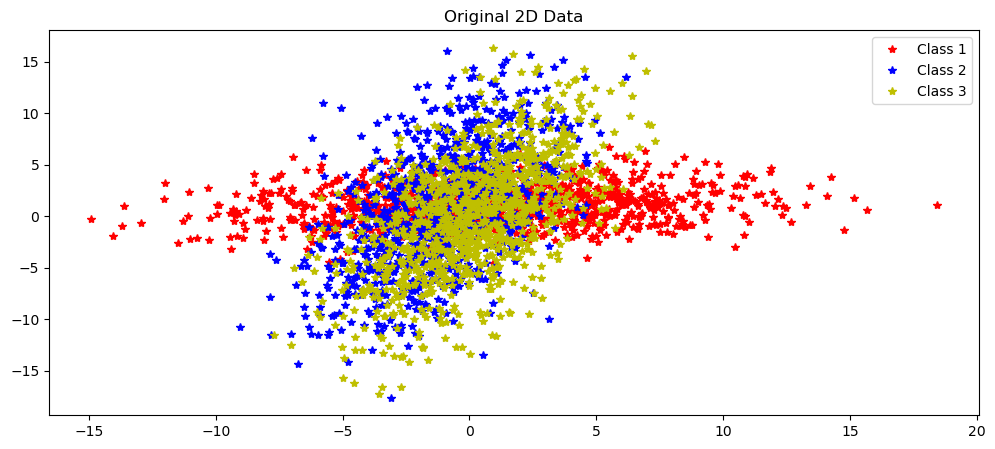

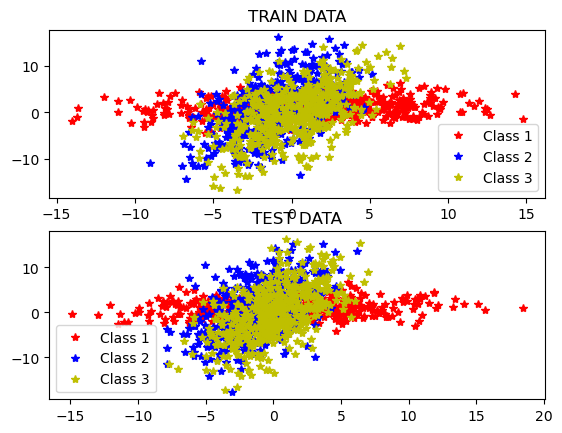

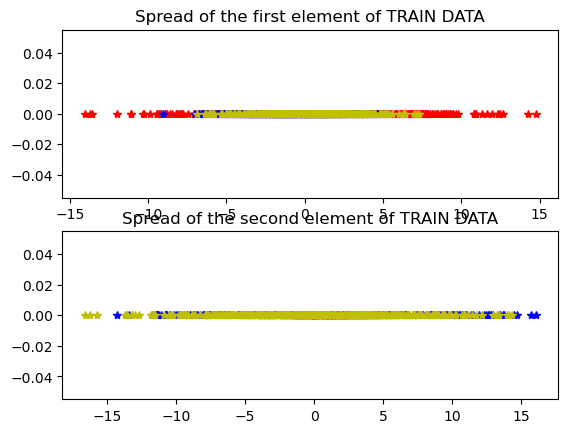

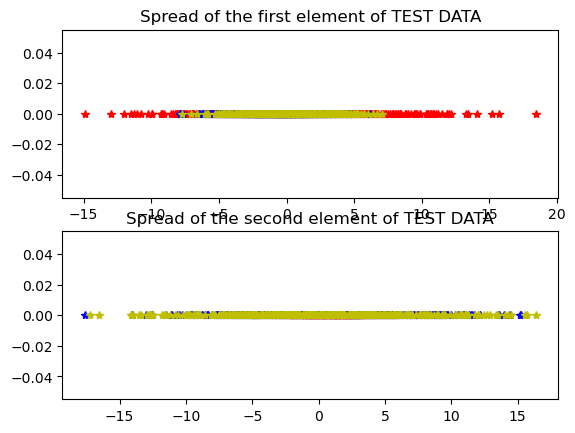

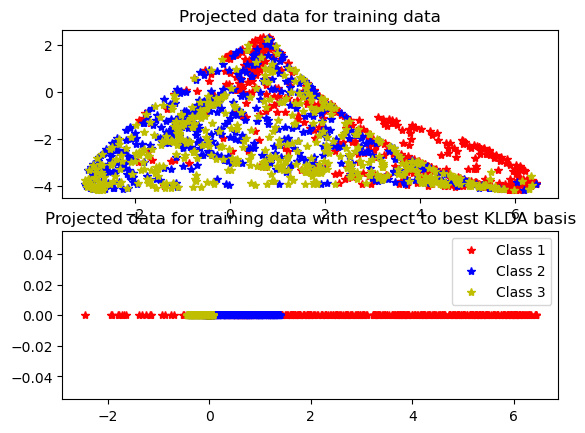

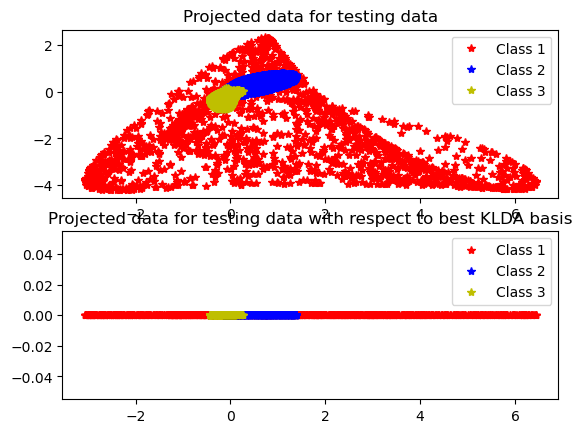

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig, pinv
np.random.seed(0)
# Gaussian Kernel function
def gausskernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))

# Parameter
sigma = 3.2

# Data Generation for Class 1
M1 = np.array([1, 1])
CX1 = np.array([[0.7, 0.6], [0.1, 0.5]])
eigvals1, E1 = np.linalg.eig(CX1)
X = np.random.randn(2, 1000)*5
X1 = E1 @ np.diag(np.sqrt(eigvals1)) @ X + M1[:, np.newaxis]
# Data Generation for Class 2
M2 = np.array([-1, 1])
CX2 = np.array([[0.9, 0.1], [0.8, 0.7]])
eigvals2, E2 = np.linalg.eig(CX2)
X = np.random.randn(2, 1000)*5
X2 = E2 @ np.diag(np.sqrt(eigvals2)) @ X + M2[:, np.newaxis]
# Data Generation for Class 3
M3 = np.array([0, 0])
CX3 = np.array([[0.85, 0.2], [0.4, 0.9]])
eigvals3, E3 = np.linalg.eig(CX2)
X = np.random.randn(2, 1000)*5
X3 = E3 @ np.diag(np.sqrt(eigvals3)) @ X + M3[:, np.newaxis]

plt.figure(1,figsize=(12, 5))
plt.plot(X1[0], X1[1], 'r*', label='Class 1')
plt.plot(X2[0], X2[1], 'b*', label='Class 2')
plt.plot(X3[0], X3[1], 'y*', label='Class 3')
plt.title('Original 2D Data')
plt.legend()
plt.savefig("Fig 1_KLDA")

# Splitting of data into train and test based on random permutation
perm = np.argsort(np.random.rand(1000))
TRAINDATA1 = X1[:, perm[:500]]
TRAINDATA2 = X2[:, perm[:500]]
TRAINDATA3 = X3[:, perm[:500]]
TESTDATA1 = X1[:, perm[500:]]
TESTDATA2 = X2[:, perm[500:]]
TESTDATA3 = X3[:, perm[500:]]

TRAINDATA = np.hstack((TRAINDATA1, TRAINDATA2, TRAINDATA3))
TESTDATA = np.hstack((TESTDATA1, TESTDATA2, TESTDATA3))

# Plotting training and test data
plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(TRAINDATA1[0], TRAINDATA1[1], 'r*', label="Class 1")
plt.plot(TRAINDATA2[0], TRAINDATA2[1], 'b*', label="Class 2")
plt.plot(TRAINDATA3[0], TRAINDATA3[1], 'y*', label="Class 3")
plt.title("TRAIN DATA")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(TESTDATA1[0], TESTDATA1[1], 'r*', label="Class 1")
plt.plot(TESTDATA2[0], TESTDATA2[1], 'b*', label="Class 2")
plt.plot(TESTDATA3[0], TESTDATA3[1], 'y*', label="Class 3")
plt.title("TEST DATA")
plt.legend()
plt.savefig("Fig 2_KLDA")

# Projections of Train and test data plotted with respect to their features,classwise
plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(TRAINDATA1[0], np.zeros(500), 'r*')
plt.plot(TRAINDATA2[0], np.zeros(500), 'b*')
plt.plot(TRAINDATA3[0], np.zeros(500), 'y*')
plt.title("Spread of the first element of TRAIN DATA")

plt.subplot(2, 1, 2)
plt.plot(TRAINDATA1[1], np.zeros(500), 'r*')
plt.plot(TRAINDATA2[1], np.zeros(500), 'b*')
plt.plot(TRAINDATA3[1], np.zeros(500), 'y*')
plt.title("Spread of the second element of TRAIN DATA")
plt.savefig("Fig 3_KLDA")

plt.figure(4)
plt.subplot(2, 1, 1)
plt.plot(TESTDATA1[0], np.zeros(500), 'r*')
plt.plot(TESTDATA2[0], np.zeros(500), 'b*')
plt.plot(TESTDATA3[0], np.zeros(500), 'y*')
plt.title("Spread of the first element of TEST DATA")

plt.subplot(2, 1, 2)
plt.plot(TESTDATA1[1], np.zeros(500), 'r*')
plt.plot(TESTDATA2[1], np.zeros(500), 'b*')
plt.plot(TESTDATA3[1], np.zeros(500), 'y*')
plt.title("Spread of the second element of TEST DATA")
plt.savefig("Fig 4_KLDA")

# Construction of the Gram Matrix using gaussian kernel
G = np.zeros((1500, 1500))
for i in range(1500):
    for j in range(1500):
        G[i, j] = gausskernel(TRAINDATA[:, i], TRAINDATA[:, j], sigma)

X1_kernel = G[:, :500]
X2_kernel = G[:, 500:1000]
X3_kernel = G[:, 1000:]

# Calculation of means
MEAN1 = np.mean(X1_kernel, axis=1)
MEAN2 = np.mean(X2_kernel, axis=1)
MEAN3 = np.mean(X3_kernel, axis=1)

# Construction of Between-class scatter matrix
C=(MEAN1+MEAN2+MEAN3)/3
M1 = MEAN1[:, np.newaxis]  # shape (2,1)
M2 = MEAN2[:, np.newaxis]
M3 = MEAN3[:, np.newaxis]
C = C[:, np.newaxis]       # shape (2,1)
SB= 500*(((M1-C) @ (M1-C).T) + ((M2-C) @ (M2-C).T) + ((M3-C) @ (M3-C).T))

# Construction of Within-class scatter matrix
SW = ((X1_kernel - M1) @ (X1_kernel - M1).T +
      (X2_kernel - M2) @ (X2_kernel - M2).T +
      (X3_kernel - M3) @ (X3_kernel - M3).T)


# Solving the generalized eigenvalue problem
eigvals, eigvecs = eigh(pinv(SW) @ SB)
# Sorting of eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]
E = eigvecs[:, idx]
# E = eigvals[idx]

# Projecting training data with respect to the eigen vector that maximizes the distinction
Y1 = E.T @ X1_kernel
Y2 = E.T @ X2_kernel
Y3 = E.T @ X3_kernel

plt.figure(5)
plt.subplot(2, 1, 1)
plt.plot(Y1[0],Y1[1],'r*', label="Class 1")
plt.plot(Y2[0],Y2[1],'b*', label="Class 2")
plt.plot(Y3[0],Y3[1],'y*', label="Class 3")
plt.title("Projected data for training data")
plt.legend

plt.subplot(2, 1, 2)
plt.plot(Y1[:500][0],np.zeros_like(Y1[:500][0]),'r*', label="Class 1")
plt.plot(Y2[500:1000][0],np.zeros_like(Y2[500:1000][0]),'b*', label="Class 2")
plt.plot(Y3[1000:][0],np.zeros_like(Y3[1000:][0]),'y*', label="Class 3")
plt.title("Projected data for training data with respect to best KLDA basis")
plt.legend()
plt.savefig("Fig 5_KLDA")

# Projecting test data
PR = []
for i in range(1500):
    temp=[];
    for j in range(1500):
        temp.append(gausskernel(TESTDATA[:, i], TRAINDATA[:, j], sigma))
    
    PR.append(E.T @ temp)

PR = np.real(np.array(PR).T)


plt.figure(6)
plt.subplot(2, 1, 1)
plt.plot(PR[:500][0],PR[:500][1],'r*', label="Class 1")
plt.plot(PR[500:1000][0],PR[500:1000][1],'b*', label="Class 2")
plt.plot(PR[1000:][0],PR[1000:][1],'y*', label="Class 3")
plt.title("Projected data for testing data")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(PR[:500][0],np.zeros_like(PR[:500][0]),'r*', label="Class 1")
plt.plot(PR[500:1000][0],np.zeros_like(PR[500:1000][0]),'b*', label="Class 2")
plt.plot(PR[1000:][0],np.zeros_like(PR[1000:][0]),'y*', label="Class 3")
plt.title("Projected data for testing data with respect to best KLDA basis")
plt.legend()
plt.savefig("Fig 6_KLDA")

